In [1]:
import numpy as np
import itertools
import random
from matplotlib import pyplot as plt
from collections import defaultdict
import os
import shutil

INITIAL_GENES = 20
INITIAL_NUMBER_OF_WEIGHTS = 1

In [2]:
def fitness_function(x_s, y_s, coefficients):
    difference = y_s
    for i in range(len(coefficients)):
        difference = difference - (x_s ** i) * coefficients[i]

    return np.sum(difference ** 2)
    # return np.sum(difference ** 2) + sum([coefficient ** 2 for coefficient in coefficients]) + len(coefficients)


def cal_pop_fitness(x_s, y_s, pop):
    qualities = {}
    for chromosome in pop:
        qualities[tuple(chromosome)] = fitness_function(x_s, y_s, chromosome)
    return qualities


def initial_population():
    init_population = []
    for indv_num in range(INITIAL_GENES):
        init_population.append([np.random.standard_normal() * 10 for _ in range(INITIAL_NUMBER_OF_WEIGHTS)])
    return init_population


def select_mating_pool(population, x_s, y_s, num_parents):
    parents = sorted(population, key=lambda x: fitness_function(x_s, y_s, x))[:num_parents]
    return parents


def crossover(parents, n_individuals=150):
    new_population = parents[:]
    num_newly_generated = n_individuals - len(parents)
    parents_permutations = list(itertools.permutations(iterable=range(0, len(parents)), r=2))
    selected_permutations = random.sample(range(len(parents_permutations)),
                                          num_newly_generated)

    for comb in range(len(selected_permutations)):
        selected_comb_idx = selected_permutations[comb]
        selected_comb = parents_permutations[selected_comb_idx]
        first_chromosome = parents[selected_comb[0]][:]
        second_chromosome = parents[selected_comb[1]][:]

        min_c, max_c = sorted([first_chromosome, second_chromosome], key=len)
        new_chromosome = max_c
        new_chromosome[:len(max_c) // 2] = min_c[:len(max_c) // 2]
        new_population.append(new_chromosome)

    return new_population


def mutation(population, num_parents_mating):
    for idx in range(num_parents_mating, len(population)):

        change = np.random.standard_normal() * 3
        if random.randint(0, 20) == 0:
            population[idx] = population[idx] + [change]
        else:
            gene_to_change = random.randint(0, len(population[idx]) - 1)
            population[idx][gene_to_change] = population[idx][gene_to_change] + change

    return population

In [3]:
num_parents = 20

x_s = np.array([-2.7, -2, -1, 0, 1])
y_s = np.array([-5.05, 2, -1, 0, 11])

min_x_s = np.min(x_s)
max_x_s = np.max(x_s)
x = np.linspace(min_x_s, max_x_s, num=100)

# coefficients = np.array([0, 1, 1, 4, 4, 1])
# plt.plot(x, np.sum([(x ** i) * coefficients[i] for i in range(len(coefficients))], axis=0))
# plt.scatter(x_s, y_s, c='red')
# plt.show()
# return

# x_s = np.append(np.append(x_s.reshape(-1, 1) ** 2, x_s.reshape(-1, 1), axis=1), np.ones(shape=(len(x_s), 1)),
#                 axis=1)
x_s = x_s.reshape(-1, 1)
y_s = y_s.reshape(-1, 1)

new_population = initial_population()
last_quality = 1_000_000

for iteration in range(10_000):
    parents = select_mating_pool(new_population, x_s, y_s, num_parents)
    best = parents[0]
    best_quality = fitness_function(x_s, y_s, best)
    if iteration and iteration % 1_000 == 0:
#     if best_quality < last_quality:
        print('Error : ', best_quality, ', Iteration : ', iteration, ', Weights : ',
                best)
        last_quality = best_quality
    new_population = crossover(parents)
    new_population = mutation(new_population, num_parents)

Error :  0.9403613883757533 , Iteration :  1000 , Weights :  [0.21230106261591158, 5.0275543597153876, 5.06783017740615, 0.5828262747824438, -0.20355121149097988, 0.03244690414851135, -0.002142367984715509, 0.0005320945579769477]
Error :  0.3013696509357546 , Iteration :  2000 , Weights :  [0.03735622014844658, 5.160214998848696, 5.381339125561576, 0.5851049067616169, -0.20900939197186225, 0.038154592235746736, -0.0037989183785078436, 0.0006796907449943634]
Error :  0.2341557638457688 , Iteration :  3000 , Weights :  [-0.10572254758256881, 5.188927989059678, 5.48103170345701, 0.6047917849701833, -0.20943554912412593, 0.03873618107576423, -0.0037989183785078436, 0.0006796907449943634]
Error :  0.22017886156572092 , Iteration :  4000 , Weights :  [-0.12002371231676165, 5.188927989059678, 5.50437998448221, 0.6047917849701833, -0.21068882154314975, 0.03927814800179576, -0.0037989183785078436, 0.0006796907449943634]
Error :  0.21534127860813673 , Iteration :  5000 , Weights :  [-0.140084936

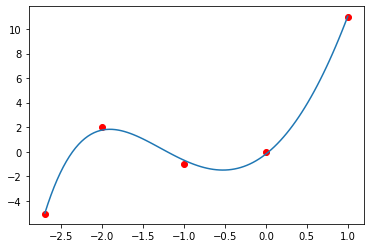

In [4]:
plt.scatter(x_s, y_s, c='red')
plt.plot(x, np.sum([(x ** i) * best[i] for i in range(len(best))], axis=0))
plt.show()